<a href="https://colab.research.google.com/github/ahmetberahasanoglu/BasicDataAnalyse/blob/main/Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
print(data.info())
print("-"*50)
print(data["Physical_Activity"].value_counts())
#Remote calısmanın mental saglıkta, verimlilikte vs etkilerini gösteren bir veri dosyası var ve altta da bunun datatypeları yazıyor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [74]:
import pandas as pd#pandas kullanarak csv verilerini pythona aktardım
import seaborn as sns#seaborn kütüphanesi ile keman/violin tablosu gibi niş tablolar kullanılması gereken görselleştirme yaptım
import matplotlib.pyplot as plt #matplotlib kütüphanesi ile de farklı türde tablolar icin görselleştirme yaptım
data=pd.read_csv("/Impact_of_Remote_Work_on_Mental_Health.csv")
data["Physical_Activity"]=data["Physical_Activity"].fillna("nodata")
data["Mental_Health_Condition"]=data["Mental_Health_Condition"].fillna("nodata")

fillna ile bos olan kısımlara nodata diye default bir isim verdim iki sütunda bosluklar vardı

# Yeni Bölüm

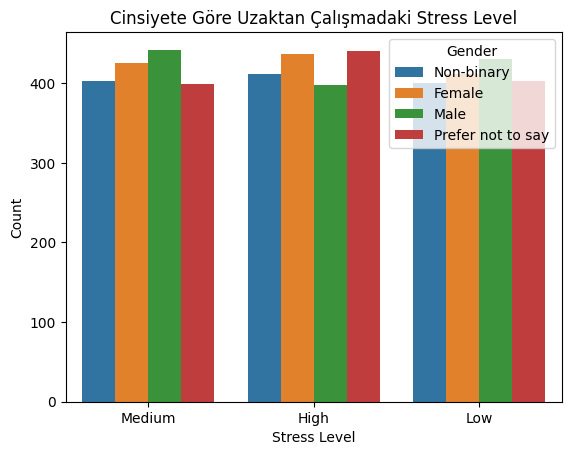

In [25]:
sns.countplot(data=data, x="Stress_Level", hue="Gender")# böyle birden fazla aynı değeri paylasan girdiler icin ilerde de benzerini...
# kullandıgım seaborn ile yapılan bir grafik
plt.title("Cinsiyete Göre Uzaktan Çalışmadaki Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

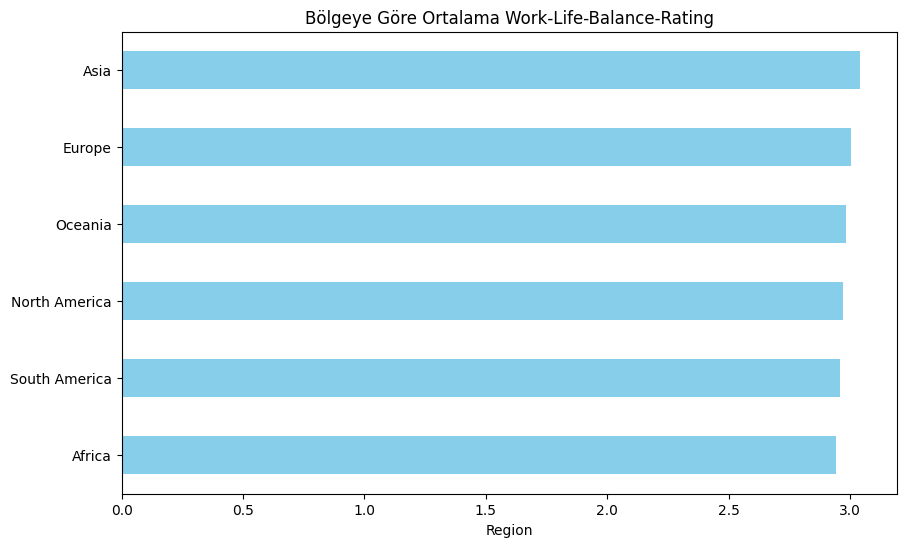

In [164]:
region_wlb = data.groupby("Region")["Work_Life_Balance_Rating"].mean().sort_values()

region_wlb.plot(kind="barh", color="skyblue", figsize=(10, 6))
plt.title("Bölgeye Göre Ortalama Work-Life-Balance-Rating")
plt.xlabel("wlb")
plt.ylabel("")
plt.show()
#matplotlib ile gayet acıklayıcı bir wlb ve region iliskisi

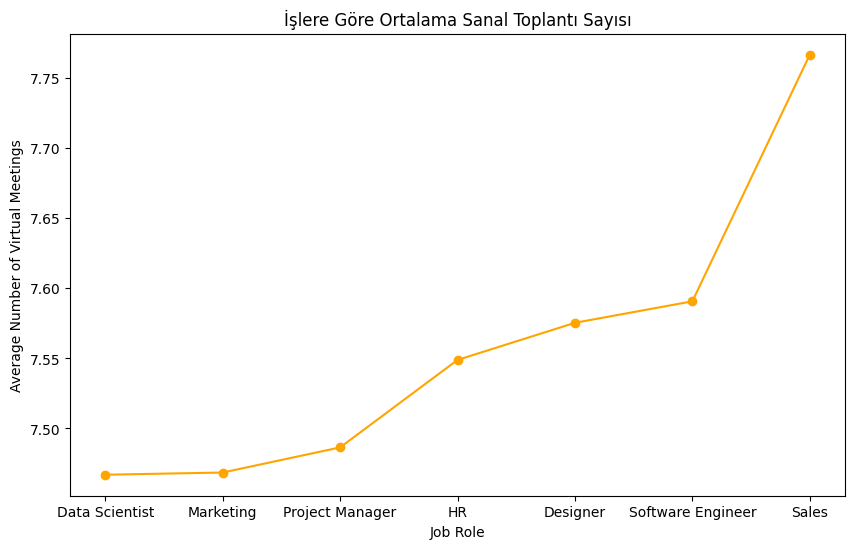

In [34]:
job_meetings = data.groupby("Job_Role")["Number_of_Virtual_Meetings"].mean().sort_values()

job_meetings.plot(kind="line", marker="o", color="orange", figsize=(10, 6))
plt.title("İşlere Göre Ortalama Sanal Toplantı Sayısı")
plt.xlabel("Job Role")
plt.ylabel("Average Number of Virtual Meetings")
plt.show()

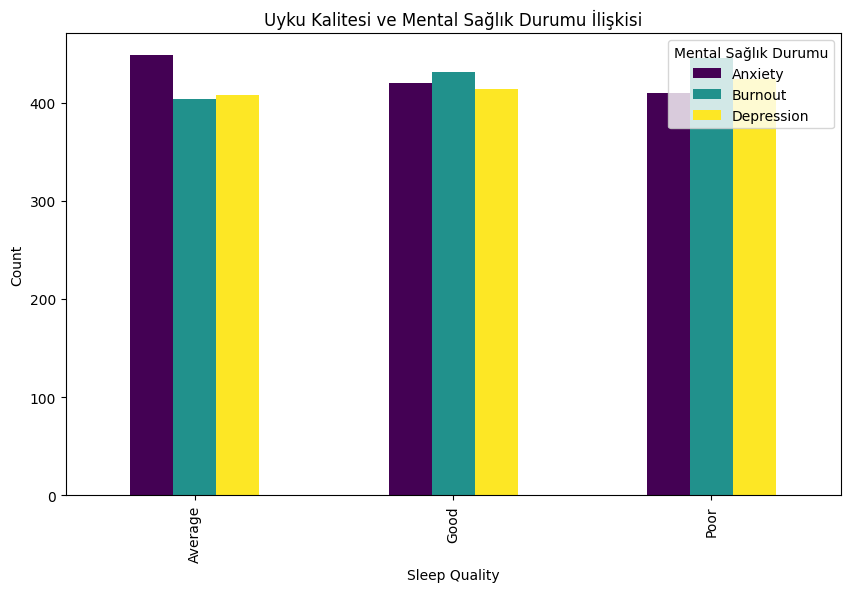

In [39]:
sleep_mental.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Uyku Kalitesi ve Mental Sağlık Durumu İlişkisi")
plt.xlabel("Sleep Quality")
plt.ylabel("Count")
plt.legend(title="Mental Sağlık Durumu")
plt.show()


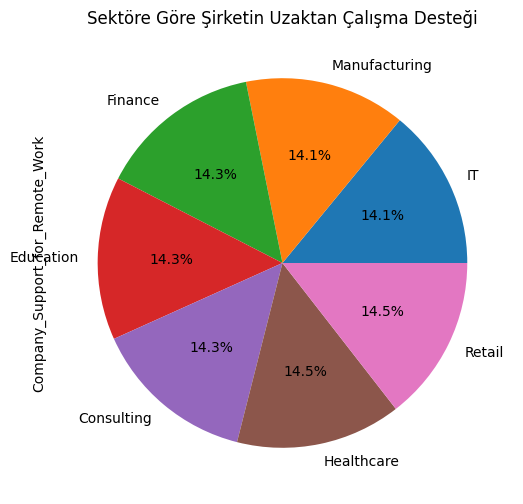

In [148]:
industry_support = data.groupby("Industry")["Company_Support_for_Remote_Work"].mean().sort_values()

industry_support.plot(kind="pie", autopct='%1.1f%%',  color="green", figsize=(15, 6))
plt.title("Sektöre Göre Şirketin Uzaktan Çalışma Desteği")
plt.ylabel("")  # Y-eksenini gizlemeyince kötü bir görüntü olusuyor
plt.show()

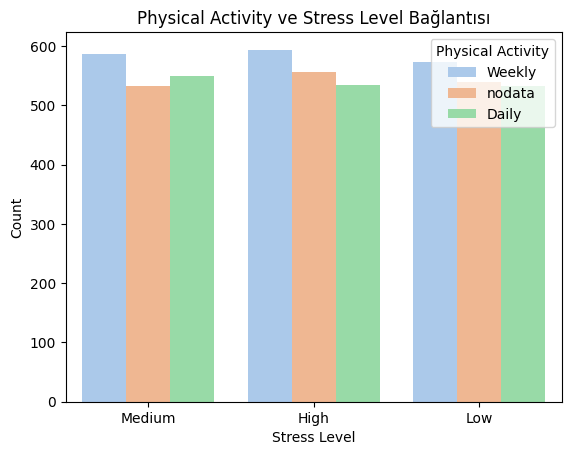

In [ ]:
sns.countplot(data=data, x="Stress_Level", hue="Physical_Activity", palette="pastel")
plt.title("Physical Activity ve Stress Level Bağlantısı")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.legend(title="Physical Activity")
plt.show()


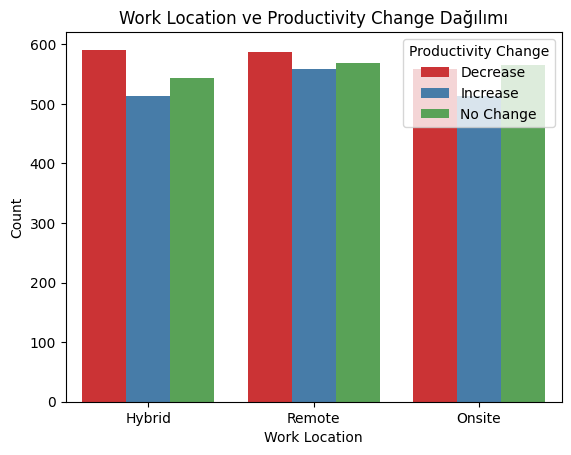

In [30]:
#location_productivity = pd.crosstab(data["Work_Location"], data["Productivity_Change"])
#location_productivity.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
sns.countplot(data=data, x="Work_Location", hue="Productivity_Change", palette="Set1")
plt.title("Work Location ve Productivity Change Dağılımı")
plt.xlabel("Work Location")
plt.ylabel("Count")
plt.legend(title="Productivity Change")
plt.show()

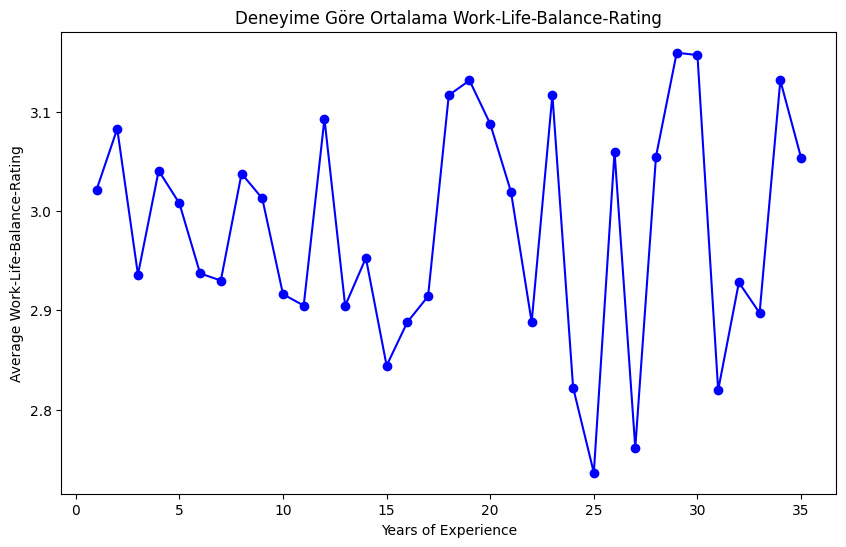

In [166]:
experience_wlb = data.groupby("Years_of_Experience")["Work_Life_Balance_Rating"].mean()

experience_wlb.plot(kind="line", marker="o", color="blue", figsize=(10, 6))
plt.title("Deneyime Göre Ortalama Work-Life-Balance-Rating")
plt.xlabel("Years of Experience")
plt.ylabel("Average Work-Life-Balance-Rating")
plt.show()

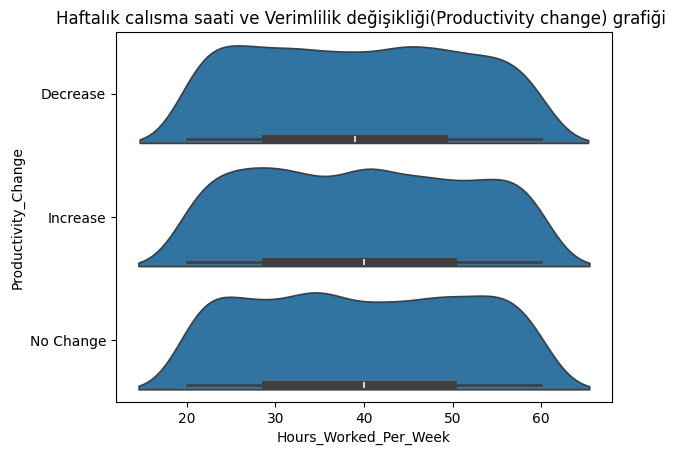

In [54]:
sns.violinplot(data=data, y="Productivity_Change", x="Hours_Worked_Per_Week", split=True)
plt.title("Haftalık calısma saati ve Verimlilik değişikliği(Productivity change) grafiği ")
plt.show()
#bu zor bir garfik ama en iyi keman grafigi ile acıklanıyor diye seaborn kullandım

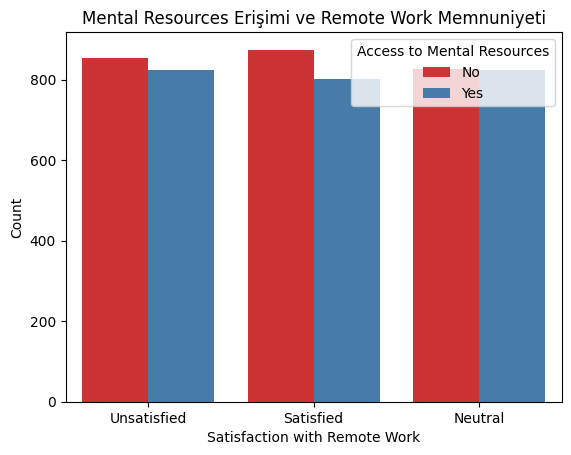

In [ ]:
sns.countplot(data=data, x="Satisfaction_with_Remote_Work", hue="Access_to_Mental_Health_Resources", palette="Set1")
plt.title("Mental Resources Erişimi ve Remote Work Memnuniyeti")
plt.xlabel("Satisfaction with Remote Work")
plt.ylabel("Count")
plt.legend(title="Access to Mental Resources")
plt.show()

In [7]:
wlbYuksekReg = data.groupby("Region")["Work_Life_Balance_Rating"].mean().idxmax()
wlbYuksekRat = data.groupby("Region")["Work_Life_Balance_Rating"].mean().max()

print(f"En yüksek Work-Life-Balance-Rating bölgesi: {wlbYuksekReg} ({wlbYuksekRat})")

En yüksek Work-Life-Balance-Rating bölgesi: Asia 


In [8]:
ortSatisfactionSaati = data[data["Satisfaction_with_Remote_Work"] == "Neutral"]["Hours_Worked_Per_Week"].mean()
print(f"Uzaktan çalışmadan 'Neutral' memnuniyet duyanların ortalama çalışma saatleri: {ortSatisfactionSaati}")

Uzaktan çalışmadan 'Neutral' memnuniyet duyanların ortalama çalışma saatleri: 39.78883495145631


In [56]:
noDataAktivite = data[data["Physical_Activity"] == "None"]["Work_Life_Balance_Rating"].mean()
haftalıkAktivite = data[data["Physical_Activity"] == "Weekly"]["Work_Life_Balance_Rating"].mean()
gunlukAktivite = data[data["Physical_Activity"] == "Daily"]["Work_Life_Balance_Rating"].mean()


print(f"fiziksel aktivite yapmayan: {noDataAktivite}, günlük fiziksel aktivite: {gunlukAktivite}, haftalık yapan:{haftalıkAktivite}")
#4.0 – 5.0	İyi	İş-yaşam dengesi iyi.
#3.0 – 3.9	Ort	İş-yaşam dengesi sınırında.
#0,0 – 2,9	kotu	İş hayatı istikrarsız. En kısa sürede önemli bir eylem gerekiyor.

fiziksel aktivite yapmayan: nan, günlük fiziksel aktivite: 2.9659653465346536, haftalık yapan:2.9925925925925925


In [61]:
stresDeneyim = data.groupby("Stress_Level")["Years_of_Experience"].mean()
print("Stress seviyesi ve ortalama deneyim yılı:\n", stresDeneyim)

Stress seviyesi ve ortalama deneyim yılı:
 Stress_Level
High      17.920522
Low       17.618237
Medium    17.887957
Name: Years_of_Experience, dtype: float64


In [78]:
support_by_industry = data.groupby("Industry")["Company_Support_for_Remote_Work"].mean()
highest_support = support_by_industry.idxmax()
lowest_support = support_by_industry.idxmin()

print(f"Şirketin remote calisma icin en yüksek destek sagladigi sektör: {highest_support}, Şirketin remote calisma icin en düsük destek sagladigi sektör: {lowest_support}")

Şirketin remote calisma icin en yüksek destek sagladigi sektör: Retail, Şirketin remote calisma icin en düsük destek sagladigi sektör: IT


In [75]:
print(data["Mental_Health_Condition"].unique())
print(data["Mental_Health_Condition"].isnull().sum())
print(data["Sleep_Quality"].isnull().sum())


['Depression' 'Anxiety' 'nodata' 'Burnout']
0
0


In [83]:
sleep_no_condition = data[data["Mental_Health_Condition"] == "Burnout"]["Sleep_Quality"].value_counts()
print(f"Depresyonda olandlarda uyku kalitesi dağılımı:\n {sleep_no_condition}")

Depresyonda olandlarda uyku kalitesi dağılımı:
 Sleep_Quality
Poor       445
Good       431
Average    404
Name: count, dtype: int64


In [84]:
stress_productivity = data.groupby("Stress_Level")["Productivity_Change"].value_counts()
print("Stress seviyesine göre verimlilik değişimi:\n", stress_productivity)

Stress seviyesine göre verimlilik değişimi:
 Stress_Level  Productivity_Change
High          Decrease               577
              Increase               561
              No Change              548
Low           Decrease               593
              No Change              545
              Increase               507
Medium        No Change              584
              Decrease               567
              Increase               518
Name: count, dtype: int64


In [86]:
wlb = data.groupby("Access_to_Mental_Health_Resources")["Work_Life_Balance_Rating"].mean()
print("Mental kaynaklara erişim ve Work-Life-Balance ortalamaları:\n", wlb)
#4.0 – 5.0	İyi	İş-yaşam dengesi iyi.
#3.0 – 3.9	Ort	İş-yaşam dengesi sınırında.
#0,0 – 2,9	kotu	İş hayatı istikrarsız. En kısa sürede önemli bir eylem gerekiyor.
#kaynak erisimi artınca wlb biraz artıyor

Mental kaynaklara erişim ve Work-Life-Balance ortalamaları:
 Access_to_Mental_Health_Resources
No     2.973365
Yes    2.995505
Name: Work_Life_Balance_Rating, dtype: float64


In [88]:
stres = data.groupby(["Stress_Level", "Physical_Activity"])["Hours_Worked_Per_Week"].mean()
print("Stress seviyesi ve fiziksel aktiviteye göre çalışma saatleri:\n", stres)

Stress seviyesi ve fiziksel aktiviteye göre çalışma saatleri:
 Stress_Level  Physical_Activity
High          Daily                40.484112
              Weekly               39.473064
              nodata               39.664273
Low           Daily                39.323308
              Weekly               39.249129
              nodata               39.564007
Medium        Daily                40.234973
              Weekly               38.885860
              nodata               39.746717
Name: Hours_Worked_Per_Week, dtype: float64


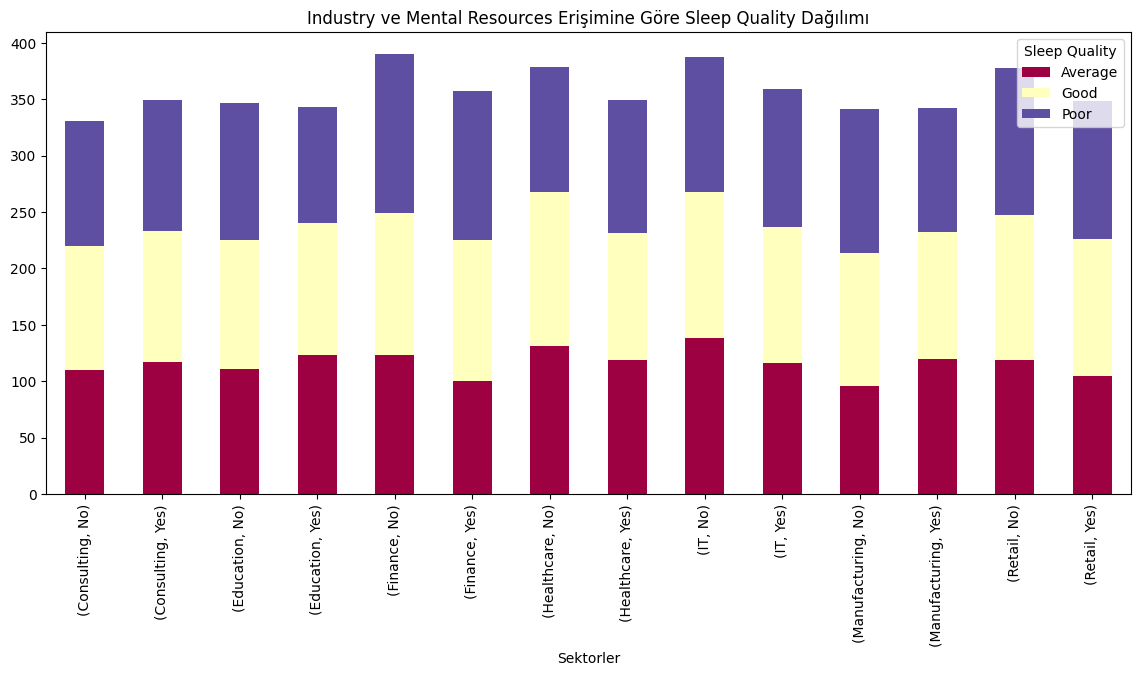

In [167]:
# Sektöre ve mental kaynaklara erişime göre uyku kalitesi dağılımı
industry_resources_sleep = pd.crosstab([data["Industry"], data["Access_to_Mental_Health_Resources"]], data["Sleep_Quality"])

industry_resources_sleep.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="Spectral")
plt.title("Industry ve Mental Resources Erişimine Göre Sleep Quality Dağılımı")
plt.xlabel("Sektorler")
plt.ylabel("")
plt.legend(title="Sleep Quality")
plt.show()


In [98]:
#sektörlere göre cinsiyet gruplandırma. Non-binary ve söylemek istemeyenler de belirtilmis
cinsIndustry = data.groupby(["Industry", "Gender"])["Gender"].count().unstack()

# Yüzde oranlarını hesaplama
cinsiyetOran = gender_industry.div(gender_industry.sum(axis=1), axis=0) * 100

# Tabloyu görüntüleme
print("Sektörlere Göre Gender Yüzdeleri:")
print(cinsiyetOran)




Sektörlere Göre Gender Yüzdeleri:
Gender            Female       Male  Non-binary  Prefer not to say
Industry                                                          
Consulting     26.617647  26.029412   23.088235          24.264706
Education      25.652174  27.246377   23.043478          24.057971
Finance        27.309237  25.033467   21.686747          25.970549
Healthcare     24.313187  24.450549   27.060440          24.175824
IT             24.128686  26.541555   23.190349          26.139410
Manufacturing  25.768668  21.961933   27.964861          24.304539
Retail         24.655647  26.446281   24.104683          24.793388


In [101]:
mental_health_issues_ratio = ((data["Mental_Health_Condition"] != "nodata")).mean() * 100
print(f"Mental sağlık sorunu olanların oranı: {mental_health_issues_ratio:.2f}%")

#oran baya yüksek dolayısıyla remote sıkıntı gibi

Mental sağlık sorunu olanların oranı: 76.08%


In [102]:
low_sleep_hours = data[data["Sleep_Quality"] == "Poor"]["Hours_Worked_Per_Week"].mean()
print(f"En düşük uyku kalitesine sahip çalışanların ortalama çalışma saatleri: {low_sleep_hours}")


En düşük uyku kalitesine sahip çalışanların ortalama çalışma saatleri: 39.61602373887241


In [103]:
average_experience_stress = data.groupby("Stress_Level")["Years_of_Experience"].mean()
print("Ortalama iş deneyimine göre stres seviyeleri:\n", average_experience_stress)


Ortalama iş deneyimine göre stres seviyeleri:
 Stress_Level
High      17.920522
Low       17.618237
Medium    17.887957
Name: Years_of_Experience, dtype: float64


In [104]:
remote_satisfaction = data[data["Work_Location"] == "Remote"]["Satisfaction_with_Remote_Work"].value_counts()
print("Santralize olmayan çalışanların uzaktan çalışma memnuniyet dağılımı:\n", remote_satisfaction)


Santralize olmayan çalışanların uzaktan çalışma memnuniyet dağılımı:
 Satisfaction_with_Remote_Work
Neutral        603
Unsatisfied    592
Satisfied      519
Name: count, dtype: int64


In [105]:
average_hours_by_gender = data.groupby("Gender")["Hours_Worked_Per_Week"].mean()
print("Cinsiyete göre ortalama çalışma saatleri:\n", average_hours_by_gender)


Cinsiyete göre ortalama çalışma saatleri:
 Gender
Female               39.098116
Male                 40.000000
Non-binary           39.341845
Prefer not to say    40.016908
Name: Hours_Worked_Per_Week, dtype: float64


In [106]:
stress_by_resources = data.groupby("Access_to_Mental_Health_Resources")["Stress_Level"].value_counts()
print("Mental sağlık kaynaklarına erişime göre stres seviyeleri:\n", stress_by_resources)


Mental sağlık kaynaklarına erişime göre stres seviyeleri:
 Access_to_Mental_Health_Resources  Stress_Level
No                                 Low             870
                                   Medium          866
                                   High            817
Yes                                High            869
                                   Medium          803
                                   Low             775
Name: count, dtype: int64


In [107]:
hours_by_experience = data.groupby("Years_of_Experience")["Hours_Worked_Per_Week"].mean()
print("Deneyime göre ortalama çalışma saati:\n", hours_by_experience)


Deneyime göre ortalama çalışma saati:
 Years_of_Experience
1     39.394366
2     41.804511
3     39.762821
4     40.250000
5     40.687023
6     40.289308
7     40.630573
8     40.270677
9     38.735849
10    39.535484
11    38.055556
12    38.549669
13    38.878981
14    40.837838
15    39.754098
16    39.007463
17    40.656250
18    40.068493
19    39.350365
20    38.963504
21    39.006452
22    39.027972
23    38.356725
24    40.170370
25    38.736486
26    38.642857
27    40.015385
28    42.031250
29    39.070064
30    39.738562
31    40.541353
32    39.072000
33    39.102740
34    39.467153
35    38.883929
Name: Hours_Worked_Per_Week, dtype: float64


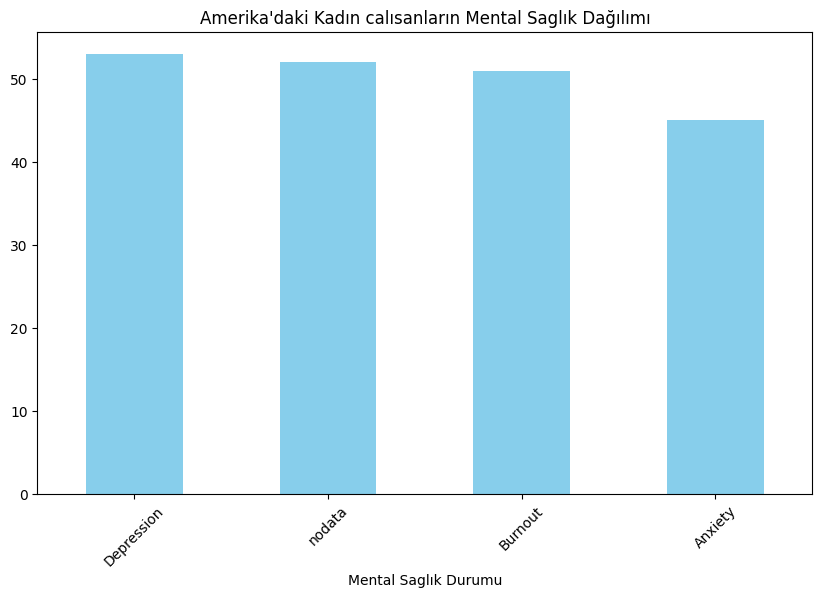

In [118]:
# Amerika'daki kadınlıarın Mental Health Condition verisini gruplandırma
amerikaKadın = data[((data["Region"] == "North America") | (data["Region"] == "South-America")) & (data["Gender"] == "Female")]

# Mental Health Condition verisini gruplandırma
mentalSaglikDurumuSayisi = amerikaKadın["Mental_Health_Condition"].value_counts()

# Grafik oluşturma
mentalSaglikDurumuSayisi .plot(kind="bar", color="skyblue", figsize=(10, 6))
plt.title("Amerika'daki Kadın calısanların Mental Saglık Dağılımı")
plt.xlabel("Mental Saglık Durumu")
plt.xticks(rotation=45)
plt.show()


In [129]:
# "Satisfaction_with_Remote_Work" sütununda tatminsiz olanları filtreleme
tatminsizIsci = data[data["Satisfaction_with_Remote_Work"] == "Unsatisfied"]

# İşe göre tatminsiz çalışan sayısını alma
tatminsizSayisi = tatminsizIsci.groupby("Job_Role").size()

# En fazla tatminsiz çalışan olan iş rolü
en_tatminsiz_is = tatminsizSayisi.idxmax()
en_tatminsiz_sayi = tatminsizSayisi.max()

print(f"En fazla tatminsiz çalışan iş rolü: {en_tatminsiz_is} ({en_tatminsiz_sayi} çalışan)")



En fazla tatminsiz çalışan iş rolü: Designer (260 çalışan)


In [130]:
stresliIndustry = data.groupby("Industry")["Stress_Level"].value_counts().idxmax()
print(f"En fazla çalışan stres seviyesinin olduğu sektör: {stresliIndustry}")


En fazla çalışan stres seviyesinin olduğu sektör: ('Finance', 'High')


In [134]:
StresliIsci = data[data["Stress_Level"] == "High"]
stesliSayisi = StresliIsci.groupby("Job_Role").size()
stresliIS = stesliSayisi.idxmax()
stresliSayisi=stesliSayisi.max()
print(f"En stresli işci grubu ve sayisi: {stresliIS} ({en_tatminsiz_sayi} çalışan)")

En fazla çalışan stres seviyesinin olduğu sektör: Project Manager (260 çalışan)


In [138]:
stress_level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_level_mapping)

# Mesleklere göre ortalama stres seviyesini hesapla
average_stress_by_job = data.groupby('Job_Role')['Stress_Level_Numeric'].mean().reset_index()

# Stres seviyesine göre sırala (en yüksekten en düşüğe)
sorted_stress_jobs = average_stress_by_job.sort_values(by='Stress_Level_Numeric', ascending=False)

# En stresli mesleği bul
most_stressful_job = sorted_stress_jobs.iloc[0]

print("En stresli meslek:", most_stressful_job['Job_Role'])
print("Ortalama stres seviyesi:", most_stressful_job['Stress_Level_Numeric'])

En stresli meslek: Project Manager
Ortalama stres seviyesi: 2.0338753387533877


In [135]:
average_sleep_by_industry = data.groupby("Industry")["Sleep_Quality"].value_counts()
print("Sektörlere göre uyku kalitesi dağılımı:\n", average_sleep_by_industry)


Sektörlere göre uyku kalitesi dağılımı:
 Industry       Sleep_Quality
Consulting     Average          227
               Poor             227
               Good             226
Education      Average          234
               Good             231
               Poor             225
Finance        Poor             273
               Good             251
               Average          223
Healthcare     Average          250
               Good             249
               Poor             229
IT             Average          254
               Good             251
               Poor             241
Manufacturing  Poor             237
               Good             230
               Average          216
Retail         Poor             253
               Good             249
               Average          224
Name: count, dtype: int64


<ipython-input-136-b28ec541bd03>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Satisfaction_Numeric', y='Region', data=average_satisfaction_by_region, palette='coolwarm')


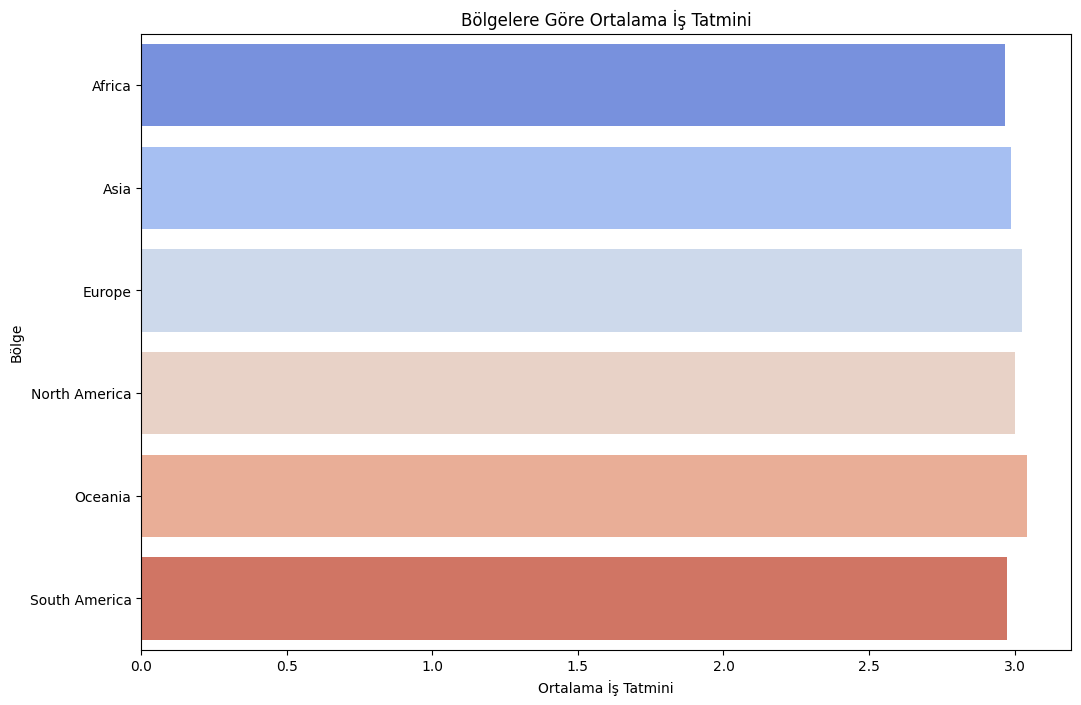

In [136]:
satisfaction_mapping = {
    'Very Satisfied': 5,
    'Satisfied': 4,
    'Neutral': 3,
    'Unsatisfied': 2,
    'Very Unsatisfied': 1
}
data['Satisfaction_Numeric'] = data['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)

# Bölgelere göre ortalama iş tatminini hesapla
average_satisfaction_by_region = data.groupby('Region')['Satisfaction_Numeric'].mean().reset_index()

# Görselleştirme matplotlib ile
plt.figure(figsize=(12, 8))
sns.barplot(x='Satisfaction_Numeric', y='Region', data=average_satisfaction_by_region, palette='coolwarm')
plt.xlabel('Ortalama İş Tatmini')
plt.ylabel('Bölge')
plt.title('Bölgelere Göre Ortalama İş Tatmini')
plt.show()
#y yerine hue yazınca daha kötü bir görüntü oluyor future warningi es geçtim hocam.

<ipython-input-145-cd298d98c244>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stress_Level_Numeric', y='Job_Role', data=top_5_stress_jobs, palette='viridis',legend=False)


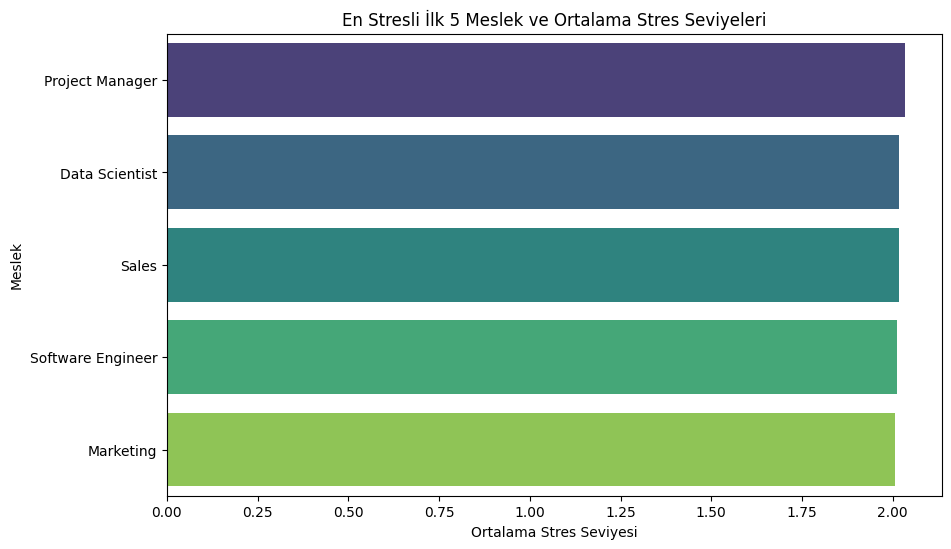

In [145]:
stress_level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_level_mapping)

# Mesleklere göre ortalama stres seviyesini hesapla
average_stress_by_job = data.groupby('Job_Role')['Stress_Level_Numeric'].mean().reset_index()

# Stres seviyesine göre sırala ve ilk 5 mesleği seç
top_5_stress_jobs = average_stress_by_job.sort_values(by='Stress_Level_Numeric', ascending=False).head(5)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Stress_Level_Numeric', y='Job_Role', data=top_5_stress_jobs, palette='viridis',legend=False)
plt.xlabel('Ortalama Stres Seviyesi')
plt.ylabel('Meslek')
plt.title('En Stresli İlk 5 Meslek ve Ortalama Stres Seviyeleri')
plt.show()
#y yerine hue yazınca daha kötü bir görüntü oluyor future warningi es geçtim hocam.x2

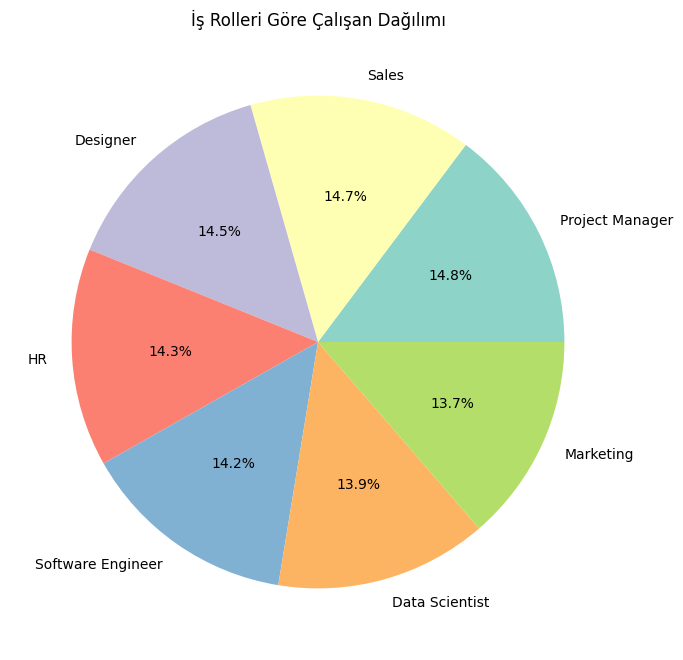

In [150]:
job_role_counts = data["Job_Role"].value_counts()


plt.figure(figsize=(8, 8))#yinematplotlib kullandık
job_role_counts.plot(kind="pie", autopct='%1.1f%%',  colors=sns.color_palette("Set3", len(job_role_counts)))
plt.title("İş Rolleri Göre Çalışan Dağılımı")
plt.ylabel("")  # Y-eksenini gizlemeyince kötü bir görüntü olusuyor
plt.show()

In [151]:
work_hours_mental_health = data.groupby("Hours_Worked_Per_Week")["Mental_Health_Condition"].value_counts()
print("Çalışma Saatlerine Göre Mental Sağlık Durumu:\n", work_hours_mental_health)


Çalışma Saatlerine Göre Mental Sağlık Durumu:
 Hours_Worked_Per_Week  Mental_Health_Condition
20                     nodata                     43
                       Depression                 36
                       Burnout                    33
                       Anxiety                    25
21                     Burnout                    38
                                                  ..
59                     Anxiety                    28
60                     Depression                 35
                       Burnout                    31
                       nodata                     25
                       Anxiety                    21
Name: count, Length: 164, dtype: int64


In [152]:
mental_health_job_satisfaction = data.groupby("Mental_Health_Condition")["Satisfaction_with_Remote_Work"].value_counts()
print("Mental Sağlık Durumu ve İş Tatmini Dağılımı:\n", mental_health_job_satisfaction)


Mental Sağlık Durumu ve İş Tatmini Dağılımı:
 Mental_Health_Condition  Satisfaction_with_Remote_Work
Anxiety                  Unsatisfied                      431
                         Satisfied                        428
                         Neutral                          419
Burnout                  Unsatisfied                      432
                         Neutral                          430
                         Satisfied                        418
Depression               Satisfied                        439
                         Neutral                          410
                         Unsatisfied                      397
nodata                   Unsatisfied                      417
                         Satisfied                        390
                         Neutral                          389
Name: count, dtype: int64


In [154]:
age_stress_level = data.groupby("Age")["Stress_Level"].value_counts()
print("Yaşa Göre Stress Seviyesi Dağılımı:\n", age_stress_level)


Yaşa Göre Stress Seviyesi Dağılımı:
 Age  Stress_Level
22   High            47
     Medium          43
     Low             41
23   Low             49
     Medium          49
                     ..
59   Medium          40
     Low             34
60   High            51
     Medium          48
     Low             26
Name: count, Length: 117, dtype: int64


In [156]:
location_productivity = data.groupby("Work_Location")["Social_Isolation_Rating"].value_counts()
print("Çalışma Lokasyonuna Göre Verimlilik Değişimi:\n", location_productivity)


Çalışma Lokasyonuna Göre Verimlilik Değişimi:
 Work_Location  Social_Isolation_Rating
Hybrid         4                          343
               2                          341
               3                          335
               5                          318
               1                          312
Onsite         4                          346
               2                          345
               5                          321
               3                          314
               1                          311
Remote         2                          380
               4                          348
               3                          343
               1                          330
               5                          313
Name: count, dtype: int64


In [161]:
toplanti_is_rolu = data.groupby("Social_Isolation_Rating")["Number_of_Virtual_Meetings"].value_counts()
print("sosyal izolasyon oranı ve Ortalama Sanal Görüşme(zoom fln) Sayısı:\n", toplanti_is_rolu)
#0iyi 16 berbatdurum

sosyal izolasyon oranı ve Ortalama Sanal Görüşme(zoom fln) Sayısı:
 Social_Isolation_Rating  Number_of_Virtual_Meetings
1                        6                             71
                         3                             68
                         14                            65
                         15                            65
                         7                             63
                                                       ..
5                        11                            56
                         12                            56
                         15                            56
                         5                             54
                         6                             50
Name: count, Length: 80, dtype: int64


In [163]:
iseGoreOrtVERIM = data.groupby("Job_Role")["Productivity_Change"].agg(lambda x: x.mode()[0])
print("iseGoreOrtVERIM DEGİSİMİ:\n", iseGoreOrtVERIM)
#cogu is dalında remote ile verimlilik düşmüş veya değişmemiş ortalama olarak artan yok

iseGoreOrtVERIM:
 Job_Role
Data Scientist       No Change
Designer              Decrease
HR                    Decrease
Marketing             Decrease
Project Manager       Decrease
Sales                 Decrease
Software Engineer    No Change
Name: Productivity_Change, dtype: object
